데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


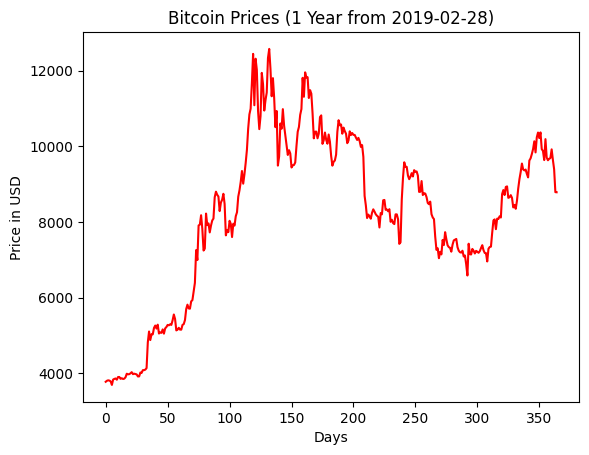

In [2]:
# 1(a). 비트코인 가격 데이터 읽기 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

f=open('../temp/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy()
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[:5])

plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 Year from 2019-02-28)')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.show()

In [5]:
# 1(b). 1년치 비트코인 가격 데이터를 윈도우로 자르기([그림 8-2])
def seq2dataset(seq,window,horizon):
    X=np.array([seq[i:(i+window)]for i in range(len(seq)-window-horizon+1)])
    Y=np.array([s for s in seq[window+horizon-1:]])
    return X,Y

X,Y = seq2dataset(seq,7,1)
print(X.shape,Y.shape)
print(X[0],Y[0])
print(X[-1],Y[-1])

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


Epoch 1/200
250/250 - 4s - loss: 1320.1477 - mae: 1320.1477 - val_loss: 362.3782 - val_mae: 362.3782 - 4s/epoch - 17ms/step
Epoch 2/200
250/250 - 3s - loss: 584.4417 - mae: 584.4417 - val_loss: 472.0569 - val_mae: 472.0569 - 3s/epoch - 13ms/step
Epoch 3/200
250/250 - 3s - loss: 544.7534 - mae: 544.7534 - val_loss: 384.1574 - val_mae: 384.1574 - 3s/epoch - 12ms/step
Epoch 4/200
250/250 - 3s - loss: 605.4396 - mae: 605.4396 - val_loss: 482.2940 - val_mae: 482.2940 - 3s/epoch - 13ms/step
Epoch 5/200
250/250 - 3s - loss: 614.1625 - mae: 614.1625 - val_loss: 520.1256 - val_mae: 520.1256 - 3s/epoch - 13ms/step
Epoch 6/200
250/250 - 3s - loss: 578.8727 - mae: 578.8727 - val_loss: 494.1861 - val_mae: 494.1861 - 3s/epoch - 12ms/step
Epoch 7/200
250/250 - 3s - loss: 559.9951 - mae: 559.9951 - val_loss: 357.3586 - val_mae: 357.3586 - 3s/epoch - 13ms/step
Epoch 8/200
250/250 - 3s - loss: 531.3413 - mae: 531.3413 - val_loss: 402.9186 - val_mae: 402.9186 - 3s/epoch - 12ms/step
Epoch 9/200
250/250 - 

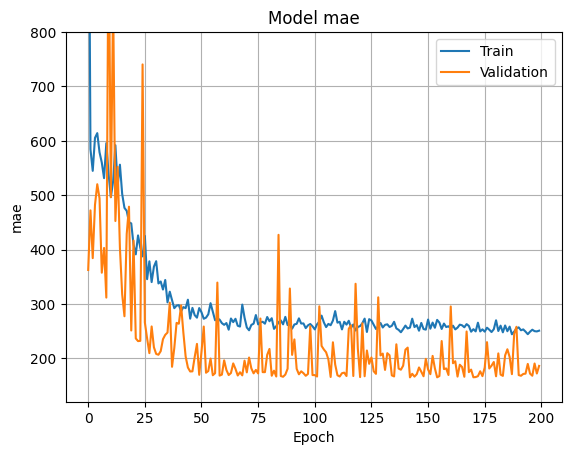

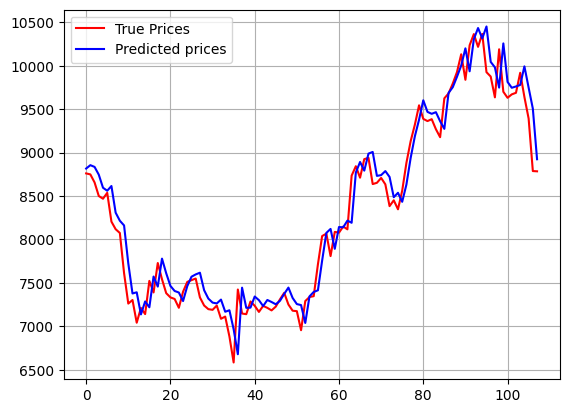

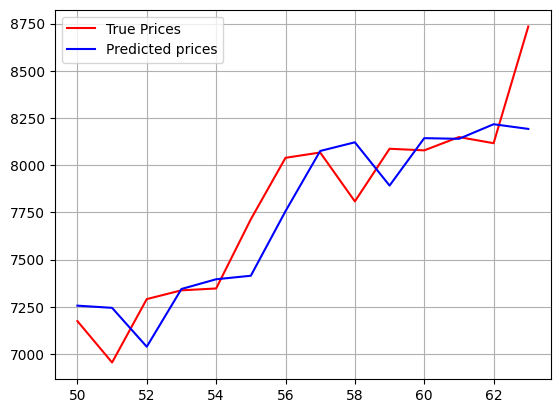

In [1]:
#2. LSTM을 이용한 비트코인 가격 예측
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

coindesk_data=pd.read_csv(open('../temp/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r'),header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy()

def seq2dataset(seq,window,horizon):
    x = np.array([seq[i:(i+window)] for i in range(len(seq)-window-horizon+1)])
    y = np.array([s for s in seq[window+horizon-1:]])
    return x,y

X,Y = seq2dataset(seq,7,1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split=int(len(X)*0.7)
x_train,x_test = X[:split],X[split:]
y_train,y_test = Y[:split],Y[split:]

model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수: ",ev[0],'MAE:',ev[1])

pred=model.predict(x_test)
print('평균절댓값백분율오차(MAPE):',sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True Prices','Predicted prices'],loc='best')
plt.grid()
plt.show()

x_range=range(50,64)
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True Prices','Predicted prices'],loc='best')
plt.grid()
plt.show()

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]
Epoch 1/200
250/250 - 4s - loss: 2395.2173 - mae: 2395.2173 - val_loss: 495.4903 - val_mae: 495.4903 - 4s/epoch - 18ms/step
Epoch 2/200
250/250 - 3s - loss: 543.0765 - mae: 543.0765 - val_loss: 308.9064 - val_mae: 308.9064 - 3s/epoch - 12ms/step
Epoch 3/200
250/250 - 3s - loss: 538.2965 - mae: 538.2965 - val_loss: 386.6287 - val_mae: 386.6287 - 3s/epoch - 12ms/step
Epoch 4/200
250/250 - 3s - loss: 477.4020 - mae: 477.4020 - val_loss: 458.5844 - val_mae: 458.5844 - 3s/epoch - 12ms/step
Epoch 5/200
250/2

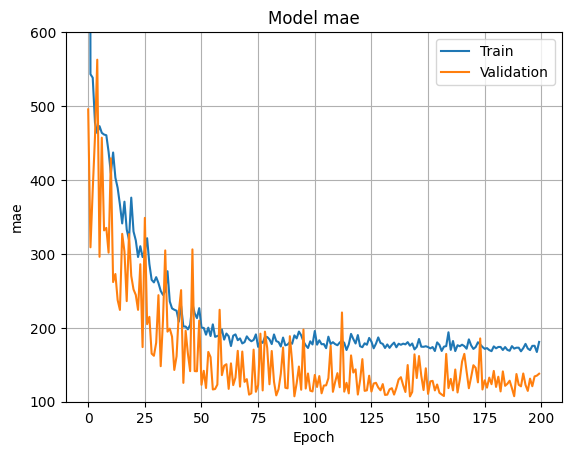

In [1]:
# 3. 다중 채널 비트코인 가격 예측 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

f=open('../temp/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data = pd.read_csv(f,header=0)
seq = coindesk_data[['Closing Price (USD)', '24h Open (USD)', '24h High (USD)', '24h Low (USD)']].to_numpy()

def seq2dataset(seq,window,horizon):
    X = np.array([seq[i:(i+window)] for i in range(len(seq)-(window+horizon)+1)])
    Y = np.array([s for s in seq[window+horizon-1:]])
    return X,Y

w,h=7,1

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split=int(len(X)*0.7)
data_split = lambda x,split_idx: (x[0:split_idx],x[split_idx:])
x_train,x_test = data_split(X,split)
y_train,y_test = data_split(Y,split)

model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print('손실 함수: ',ev[0],'MAE: ',ev[1])

pred=model.predict(x_test)
print('LSTM 평균절댓값백분율오차(MAPE):',sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()


In [2]:
# 4(a). music21 라이브러리로 ABC 표기 연주하기 
import music21
little_star='tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2'
music21.converter.parse(little_star).show('mid')

In [66]:
# 4(b). 신경망으로 악보 학습 후 새로운 곡 생성하기 
import numpy as np 
import math
note=['c','d','e','f','g','a','b']
note2num = lambda n: note.index(n)+1 
num2note = lambda n: note[n-1]

def abc2timeseries(s):
    notes=s.split(' ')[2:]
    return [[note2num(note[0]),int(note[1])] for note in notes]

def timeseries2abc(time):
    return 'tinynotation: 4/4 ' + ' '.join([num2note(t[0])+str(t[1]) for t in time])
    
    
onehot_len = 21
onehot=lambda n:[n%7+1,2**(n//7+1)] if n < onehot_len else 'out of range'
onehot_index = lambda l:l[0] + (int(math.log2(l[1])))*7 - 8

import tensorflow as tf 
def to_onehot(l):
    return tf.keras.utils.to_categorical(np.array([onehot_index(o) for o in l]),onehot_len)

def seq2dataset(seq,window,horizon):
    x = np.array([seq[i:(i+window)] for i in range(len(seq)-window-horizon+1)])
    y = np.array([s for s in seq[window+horizon-1:]])
    return x,y

w,h=8,1

seq=abc2timeseries(little_star)
X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

split = int(len(X)*1.0)
x_train = X[0:split]
y_train = Y[0:split]
y_train = to_onehot(y_train)

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=1,verbose=2)

def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot(np.argmax(p))],axis=0)
    return timeseries2abc(music)

new_song = arranging_music(model,x_train[0],50)

print(new_song)

music21.converter.parse(new_song).show('mid')

(34, 8, 2) (34, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]
 [4 4]] [4 4]
Epoch 1/200
34/34 - 2s - loss: 2.9028 - accuracy: 0.0588 - 2s/epoch - 57ms/step
Epoch 2/200
34/34 - 0s - loss: 2.2826 - accuracy: 0.2353 - 406ms/epoch - 12ms/step
Epoch 3/200
34/34 - 0s - loss: 2.1477 - accuracy: 0.2059 - 417ms/epoch - 12ms/step
Epoch 4/200
34/34 - 0s - loss: 2.0454 - accuracy: 0.2941 - 408ms/epoch - 12ms/step
Epoch 5/200
34/34 - 0s - loss: 1.9999 - accuracy: 0.2647 - 407ms/epoch - 12ms/step
Epoch 6/200
34/34 - 0s - loss: 1.9509 - accuracy: 0.2941 - 403ms/epoch - 12ms/step
Epoch 7/200
34/34 - 0s - loss: 1.8923 - accuracy: 0.3529 - 405ms/epoch - 12ms/step
Epoch 8/200
34/34 - 0s - loss: 1.8027 - accuracy: 0.3529 - 411ms/epoch - 12ms/step
Epoch 9/200
34/34 - 0s - loss: 1.6226 - accuracy: 0.4412 - 414ms/epoch - 12ms/step
Epoch 10/200
34/34 - 0s - loss: 1.8546 - accuracy: 0.2647 - 394ms/epoch - 12ms/step
Epoch 11/200
34/34 - 0s - loss: 1.4737 - accuracy: 0.3824 - 407ms/epoch - 12ms/step
Epoch 

In [2]:
# 5. LSTM 신경망으로 악보 학습 후 새로운 곡 생성하기 
import numpy as np 
import math
import music21

little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"
spring_picnic="tinynotation: 4/8 g8 e8 g8 e8 g8 a8 g4 e8 g8 e8 c8 d8 e8 c4 g8 e8 g8 e8 g8 a8 g4 b8 a8 g8 e8 d8 e8 c4"
butterfly="tinynotation: 2/4 g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4"
song = [little_star,spring_picnic,butterfly]
note=['c','d','e','f','g','a','b']
note2num = lambda n: note.index(n)+1 
num2note = lambda n: note[n-1]

def abc2timeseries(s):
    notes=s.split(' ')[2:]
    return [[note2num(note[0]),int(note[1])] for note in notes]

def timeseries2abc(time):
    return 'tinynotation: 4/4 ' + ' '.join([num2note(t[0])+str(t[1]) for t in time])
    
    
onehot_len = 21
onehot=lambda n:[n%7+1,2**(n//7+1)] if n < onehot_len else 'out of range'
onehot_index = lambda l:l[0] + (int(math.log2(l[1])))*7 - 8

import tensorflow as tf 
def to_onehot(l):
    return tf.keras.utils.to_categorical(np.array([onehot_index(o) for o in l]),onehot_len)

def seq2dataset(seq,window,horizon):
    x = np.array([seq[i:(i+window)] for i in range(len(seq)-window-horizon+1)])
    y = np.array([s for s in seq[window+horizon-1:]])
    return x,y

w,h=8,1

seq = sum([abc2timeseries(s) for s in song],[])
X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

split = int(len(X)*1.0)
x_train = X[0:split]
y_train = Y[0:split]
y_train = to_onehot(y_train)

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=1,verbose=2)

def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot(np.argmax(p))],axis=0)
    return timeseries2abc(music)

new_song = arranging_music(model,x_train[0],50)

print(new_song)

music21.converter.parse(new_song).show('mid')

(116, 8, 2) (116, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]
 [4 4]] [4 4]
Epoch 1/200
116/116 - 3s - loss: 2.7076 - accuracy: 0.2069 - 3s/epoch - 23ms/step
Epoch 2/200
116/116 - 1s - loss: 2.3424 - accuracy: 0.2845 - 1s/epoch - 11ms/step
Epoch 3/200
116/116 - 1s - loss: 2.2505 - accuracy: 0.2931 - 1s/epoch - 11ms/step
Epoch 4/200
116/116 - 1s - loss: 2.1789 - accuracy: 0.2500 - 1s/epoch - 11ms/step
Epoch 5/200
116/116 - 1s - loss: 2.1182 - accuracy: 0.2931 - 1s/epoch - 11ms/step
Epoch 6/200
116/116 - 1s - loss: 2.0910 - accuracy: 0.3017 - 1s/epoch - 11ms/step
Epoch 7/200
116/116 - 1s - loss: 2.0365 - accuracy: 0.3362 - 1s/epoch - 11ms/step
Epoch 8/200
116/116 - 1s - loss: 2.0261 - accuracy: 0.3534 - 1s/epoch - 11ms/step
Epoch 9/200
116/116 - 1s - loss: 1.9416 - accuracy: 0.3448 - 1s/epoch - 11ms/step
Epoch 10/200
116/116 - 1s - loss: 2.0648 - accuracy: 0.3190 - 1s/epoch - 11ms/step
Epoch 11/200
116/116 - 1s - loss: 1.9314 - accuracy: 0.3621 - 1s/epoch - 11ms/step
Epoch 12/200

In [34]:
# 8-6 프로그램을 위해 IMDB dataset download 
import os
import wget
import tarfile
fpath='../temp/'
fname='aclimdb.tar.gz'
bar = lambda c,t,w: 'downloading %d%% [%d / %d]' % (c/t*100,c,t)
wget.download('http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz', out=fpath+fname, bar=bar)
with tarfile.open(fpath+fname) as f: f.extractall(fpath)
os.remove(fpath+fname)

downloading 100% [84125825 / 84125825]

In [19]:
# 6. IMDB 원본 텍스트 데이터 살펴보기 
import os 
import glob
directory='../temp/aclImdb/test/'
x,y=[],[]
for c in ['neg','pos']:
    flist = glob.glob(directory+c+'/*.txt')
    for fname in flist:
        with open(fname, encoding='utf-8') as f: x.append(f.read())
        y.append(c)
        print(c,int(flist.index(fname)/len(flist)*100),'% ',flist.index(fname),end='\r')
 
print('첫 번째 댓글:',x[0])
print('첫 번째 평가:',y[0])
print('마지막 댓글:',x[-1])
print('마지막 평가:',y[-1])

첫 번째 댓글: Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.
첫 번째 평가: neg
마지막 댓글: I've seen this story before but my kids haven't. Boy with troubled pa

In [23]:
# 7(a). 텐서플로가 제공하는 IMDB 데이터 살펴보기 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras import preprocessing
dic_siz=10000
sample_siz=512

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=dic_siz)
print(x_train.shape,x_test.shape)
print(x_train[0])

word2id = imdb.get_word_index()
id2word = {w:i for i,w in word2id.items()}

for i in range(1,21): print(id2word[i],end='/')

(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
the/and/a/of/to/is/br/in/it/i/this/that/wa

Epoch 1/20
391/391 - 3s - loss: 0.4377 - accuracy: 0.7702 - val_loss: 0.2959 - val_accuracy: 0.8748 - 3s/epoch - 8ms/step
Epoch 2/20
391/391 - 3s - loss: 0.1658 - accuracy: 0.9389 - val_loss: 0.3022 - val_accuracy: 0.8782 - 3s/epoch - 7ms/step
Epoch 3/20
391/391 - 3s - loss: 0.0588 - accuracy: 0.9841 - val_loss: 0.3634 - val_accuracy: 0.8680 - 3s/epoch - 7ms/step
Epoch 4/20
391/391 - 3s - loss: 0.0150 - accuracy: 0.9979 - val_loss: 0.4397 - val_accuracy: 0.8674 - 3s/epoch - 7ms/step
Epoch 5/20
391/391 - 3s - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.4877 - val_accuracy: 0.8686 - 3s/epoch - 7ms/step
Epoch 6/20
391/391 - 3s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5208 - val_accuracy: 0.8686 - 3s/epoch - 7ms/step
Epoch 7/20
391/391 - 3s - loss: 7.9451e-04 - accuracy: 1.0000 - val_loss: 0.5479 - val_accuracy: 0.8695 - 3s/epoch - 7ms/step
Epoch 8/20
391/391 - 3s - loss: 4.9903e-04 - accuracy: 1.0000 - val_loss: 0.5715 - val_accuracy: 0.8695 - 3s/epoch - 7ms/step
Epoch 9/20
391/3

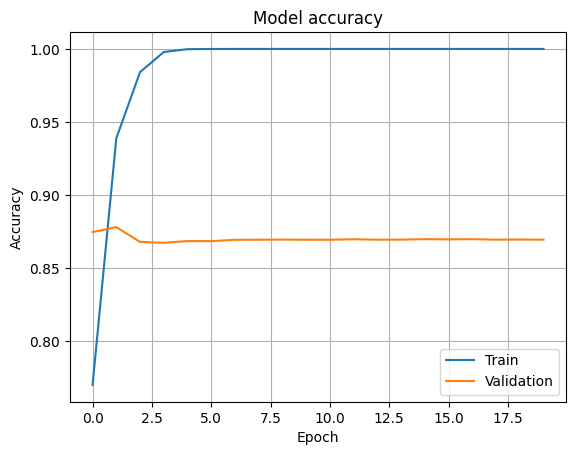

In [27]:
# 7(b). 단어 임베딩을 사용해 IMDB 데이터를 부정/긍정 평가로 분류하는 학습 모델
embed_space_dim = 16 

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(Flatten())
embed.add(Dense(32,activation='relu'))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=2)

embed.summary()

res = embed.evaluate(x_test,y_test,verbose=0)
print('정확률은',res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

Training:   0%|           0/20 ETA: ?s,  ?epochs/s

정확률은 86.50000095367432


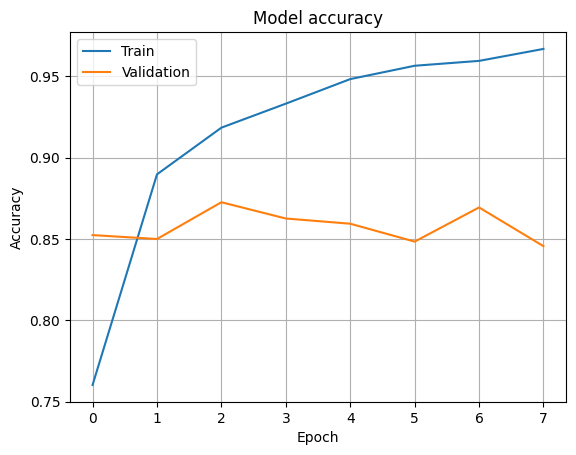

In [5]:
# 8 워드 임베딩을 사용하서 IMDB 데이터를 부정/긍정로 분류하는 LSTM 신경망 학습 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa 

dic_siz = 10000
sample_siz = 512 

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=dic_siz)

embed_space_dim = 16

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

early=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)

tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)

embed = Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist = embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2,verbose=0,callbacks=[early,tqdm_callback])

res=embed.evaluate(x_test,y_test,verbose=0)
print('정확률은',res[1]*100)

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

In [36]:
# 프로그램 8-9를 위해 IMDB dataset download 
import os 
import wget
import zipfile
fpath='../temp/'
fname='glove.6B.zip'
bar = lambda c,t,w: 'downloading %d%% [%d / %d]' % (c/t*100,c,t)
wget.download('https://nlp.stanford.edu/data/glove.6B.zip', out=fpath+fname, bar=bar)
with zipfile.ZipFile(fpath+fname) as f : f.extractall(fpath)     
os.remove(fpath+fname)

downloading 100% [862182613 / 862182613]

In [2]:
# 9(a). GloVe를 이용해 단어 임베딩 이해하기
import os 
import numpy as np 
from scipy.spatial import distance

fname='../temp/glove.6B.100d.txt'
with open(fname,encoding='utf8') as f: 
    flines = f.readlines()
    print(type(flines[0]))
    print(flines[0])
    
with open(fname,encoding='utf8') as f:
    gdict = {line.split()[0]:np.asarray(line.split()[1:],dtype='float32') for line in f}

def find_closest_words(gdict,vec):
    return sorted(gdict.keys(), key=lambda w: distance.euclidean(gdict[w],vec))

print(find_closest_words(gdict,gdict['movie'])[:5])
print(find_closest_words(gdict,gdict['school'])[:5])
print(find_closest_words(gdict,gdict['oak'])[:5])

print(find_closest_words(gdict,gdict['seoul']-gdict['korea']+gdict['spain'])[:5])
print(find_closest_words(gdict,gdict['animal']-gdict['lion']+gdict['oak'])[:5])
print(find_closest_words(gdict,gdict['queen']-gdict['king']+gdict['actress'])[:5])

<class 'str'>
the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

['movie', 'film', 'movies', 'films', 'hollywood']
['school', 'college', 'schools', 'elementary', 'students']
['oak', 'pine

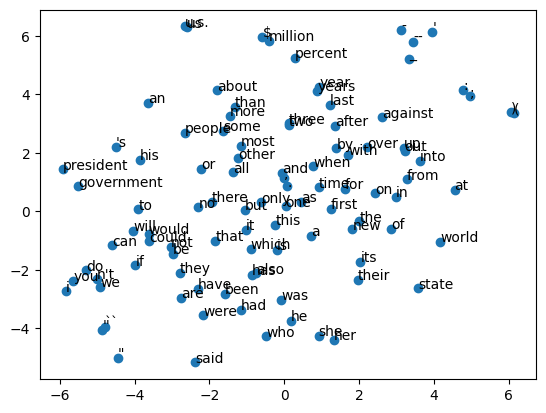

In [25]:
# 9(b). tsne를 이용한 시각화 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import numpy as np

tsne = TSNE(n_components=2, random_state=0)
words = list(gdict.keys())
vectors = np.array(list(gdict.values()))
position = tsne.fit_transform(vectors[:100])
pos = [position[:,0],position[:,1]]
plt.scatter(*pos)

for label,x,y in zip(words,*pos):
    plt.annotate(label,xy=(x,y))
plt.show()

Epoch 1/200
251/251 - 4s - loss: 992.5445 - mae: 992.5445 - val_loss: 449.6176 - val_mae: 449.6176 - 4s/epoch - 14ms/step
Epoch 2/200
251/251 - 3s - loss: 495.2006 - mae: 495.2006 - val_loss: 321.2589 - val_mae: 321.2589 - 3s/epoch - 11ms/step
Epoch 3/200
251/251 - 3s - loss: 456.6043 - mae: 456.6043 - val_loss: 409.4373 - val_mae: 409.4373 - 3s/epoch - 11ms/step
Epoch 4/200
251/251 - 3s - loss: 575.2997 - mae: 575.2997 - val_loss: 518.8390 - val_mae: 518.8390 - 3s/epoch - 11ms/step
Epoch 5/200
251/251 - 3s - loss: 531.8572 - mae: 531.8572 - val_loss: 547.1753 - val_mae: 547.1753 - 3s/epoch - 11ms/step
Epoch 6/200
251/251 - 3s - loss: 443.1505 - mae: 443.1505 - val_loss: 325.3435 - val_mae: 325.3435 - 3s/epoch - 11ms/step
Epoch 7/200
251/251 - 3s - loss: 448.3951 - mae: 448.3951 - val_loss: 263.8355 - val_mae: 263.8355 - 3s/epoch - 11ms/step
Epoch 8/200
251/251 - 3s - loss: 420.8193 - mae: 420.8193 - val_loss: 570.0422 - val_mae: 570.0422 - 3s/epoch - 11ms/step
Epoch 9/200
251/251 - 3s

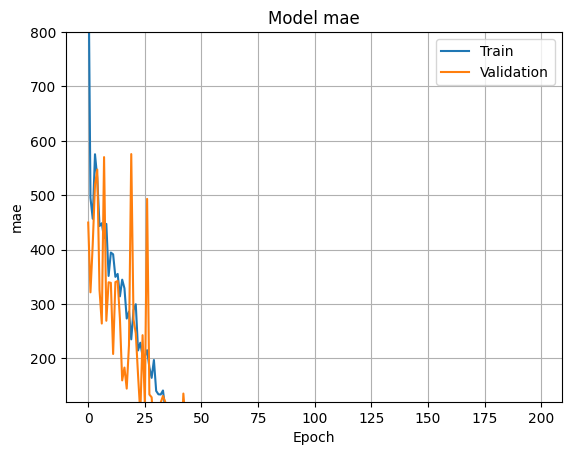

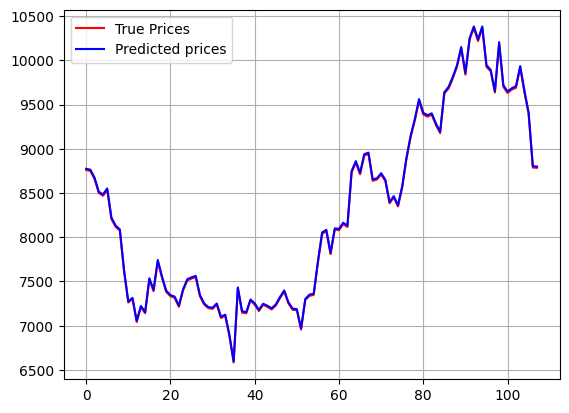

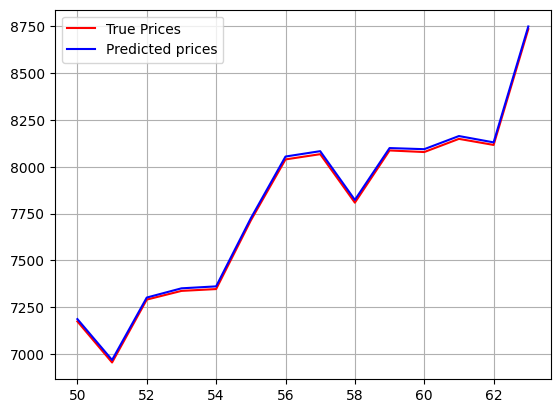

In [11]:
# 연습문제 1 오늘 값을 내일 값으로 예측하는 알고리즘을 steady라 부르기로 하자.
# [프로그램 8-2]에 steady 알고리즘은 위한 코드를 추가하시오.
# steady와 LSTM의 성능을 비교하시오.

# 2. LSTM을 이용한 비트코인 가격 예측

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

coindesk_data=pd.read_csv(open('../temp/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r'),header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy()

def seq2dataset(seq,window,horizon):
    x = np.array([seq[i:(i+window)] for i in range(len(seq)-window-horizon+1)])
    y = np.array([s for s in seq[window+horizon-1:]]) # y data의 index를 -1 하여 오늘 값을 내일 값으로 하여 예측하도록 함 
    return x,y

X,Y = seq2dataset(seq,7,0)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split=int(len(X)*0.7)
x_train,x_test = X[:split],X[split:]
y_train,y_test = Y[:split],Y[split:]

model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수: ",ev[0],'MAE:',ev[1])

pred=model.predict(x_test)
print('평균절댓값백분율오차(MAPE):',sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True Prices','Predicted prices'],loc='best')
plt.grid()
plt.show()

x_range=range(50,64)
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True Prices','Predicted prices'],loc='best')
plt.grid()
plt.show()

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]
Epoch 1/200
250/250 - 4s - loss: 1528.6908 - mae: 1528.6908 - val_loss: 328.4996 - val_mae: 328.4996 - 4s/epoch - 14ms/step
Epoch 2/200
250/250 - 3s - loss: 558.0356 - mae: 558.0356 - val_loss: 416.4355 - val_mae: 416.4355 - 3s/epoch - 11ms/step
Epoch 3/200
250/250 - 3s - loss: 542.1548 - mae: 542.1548 - val_loss: 324.4056 - val_mae: 324.4056 - 3s/epoch - 12ms/step
Epoch 4/200
250/250 - 3s - loss: 512.4122 - mae: 512.4122 - val_loss: 387.5554 - val_mae: 387.5554 - 3s/epoch - 11ms/step
Epoch 5/200
250/2

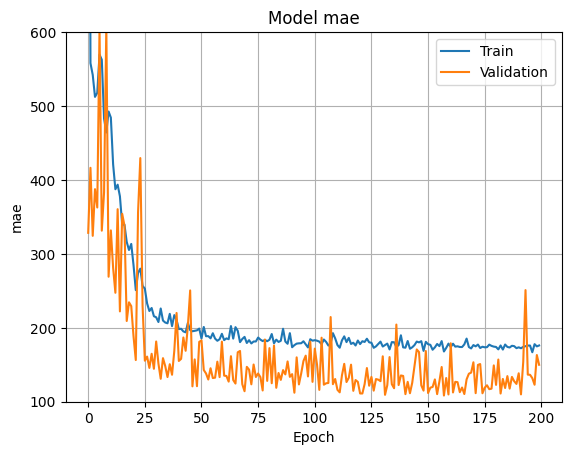

In [32]:
# 연습문제 2 [프로그램 8-3]에 등락정확률을 계산하는 코드를 추가하고 실험해보시오.

# 3. 다중 채널 비트코인 가격 예측 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

f=open('../temp/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data = pd.read_csv(f,header=0)
seq = coindesk_data[['Closing Price (USD)', '24h Open (USD)', '24h High (USD)', '24h Low (USD)']].to_numpy()

def seq2dataset(seq,window,horizon):
    X = np.array([seq[i:(i+window)] for i in range(len(seq)-(window+horizon)+1)])
    Y = np.array([s for s in seq[window+horizon-1:]])
    return X,Y

w,h=7,1

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split=int(len(X)*0.7)
data_split = lambda x,split_idx: (x[0:split_idx],x[split_idx:])
x_train,x_test = data_split(X,split)
y_train,y_test = data_split(Y,split)

model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print('손실 함수: ',ev[0],'MAE: ',ev[1])

pred=model.predict(x_test)
print('LSTM 평균절댓값백분율오차(MAPE):',sum(abs(y_test-pred)/y_test)/len(x_test))

element_up_down_accuracy = [sum([(x[-1]-y)*(x[-1]-p)>0 for x,y,p in zip(xt.T,yt,pr)])/len(pr)*100 for xt,yt,pr in zip(x_test.T,y_test.T,pred.T)]
element_name = ['Closing Price (USD)', '24h Open (USD)', '24h High (USD)', '24h Low (USD)']
print('=====각 요소의 등락정확률=====')
for ac,na in zip(element_up_down_accuracy,element_name):
    print(na, ': \t', f'{ac:.2f}%%')
print('모든 요소의 등락정확률 : ',sum(element_up_down_accuracy)/4)

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()


Training:   0%|           0/200 ETA: ?s,  ?epochs/s

model units 16 fit complete(time:  517.0712561607361 )


Training:   0%|           0/200 ETA: ?s,  ?epochs/s

model units 32 fit complete(time:  512.0047566890717 )


Training:   0%|           0/200 ETA: ?s,  ?epochs/s

model units 64 fit complete(time:  502.88112783432007 )


Training:   0%|           0/200 ETA: ?s,  ?epochs/s

model units 128 fit complete(time:  506.959810256958 )


Training:   0%|           0/200 ETA: ?s,  ?epochs/s

model units 256 fit complete(time:  545.1687316894531 )
units가  16 일때 손실 함수:  111.8577651977539  MAE:  111.8577651977539
units가  32 일때 손실 함수:  121.12207794189453  MAE:  121.12207794189453
units가  64 일때 손실 함수:  143.2354736328125  MAE:  143.2354736328125
units가  128 일때 손실 함수:  120.85504913330078  MAE:  120.85504913330078
units가  256 일때 손실 함수:  118.53235626220703  MAE:  118.53235626220703
4/4 [==============================] - 0s 4ms/step
units가  16 일때 LSTM 평균절댓값백분율오차(MAPE): [0.01969964 0.00304843 0.01522558 0.016022  ]
units가  32 일때 LSTM 평균절댓값백분율오차(MAPE): [0.02076107 0.00494346 0.01672036 0.01625803]
units가  64 일때 LSTM 평균절댓값백분율오차(MAPE): [0.01961613 0.01179035 0.02245779 0.01535139]
units가  128 일때 LSTM 평균절댓값백분율오차(MAPE): [0.01932296 0.00579852 0.01722951 0.01610514]
units가  256 일때 LSTM 평균절댓값백분율오차(MAPE): [0.02107396 0.00435021 0.01690144 0.01518511]


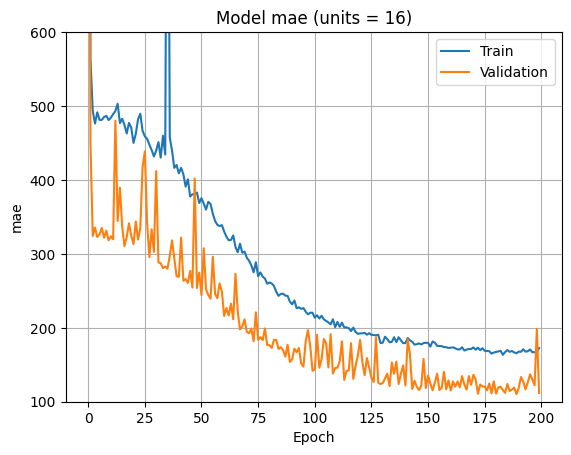

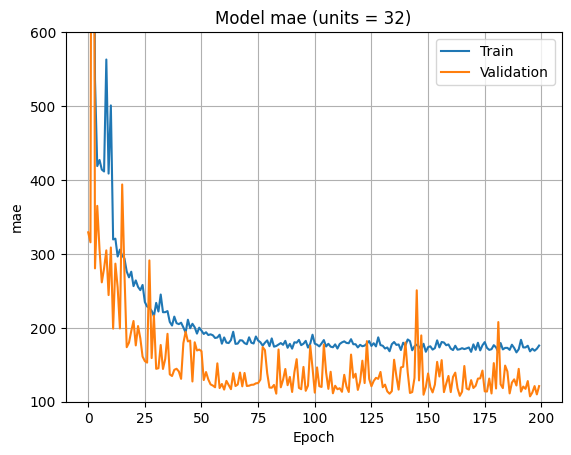

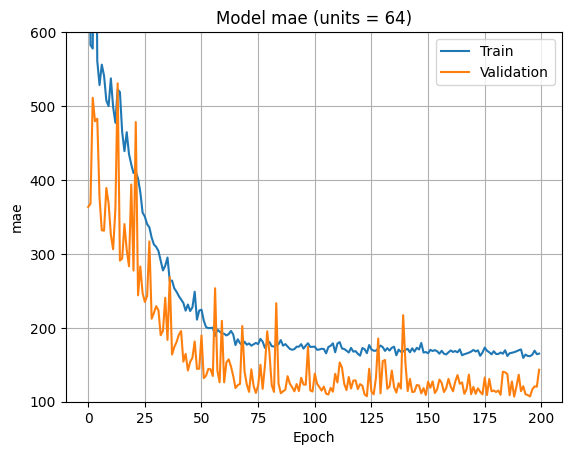

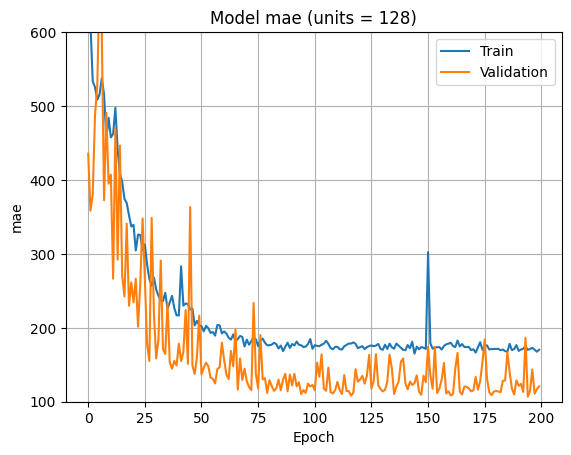

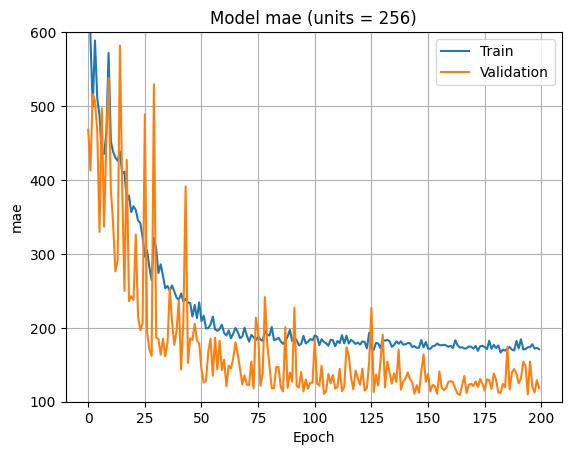

In [1]:
# 연습문제 3 [프로그램 8-3]의 36행에서 units을 16,32,64,128,256으로 변화시키며 성능 변화를 분석하시오.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

f=open('../temp/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data = pd.read_csv(f,header=0)
seq = coindesk_data[['Closing Price (USD)', '24h Open (USD)', '24h High (USD)', '24h Low (USD)']].to_numpy()

def seq2dataset(seq,window,horizon):
    X = np.array([seq[i:(i+window)] for i in range(len(seq)-(window+horizon)+1)])
    Y = np.array([s for s in seq[window+horizon-1:]])
    return X,Y

w,h=7,1

X,Y=seq2dataset(seq,w,h)

import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from time import time

split=int(len(X)*0.7)
data_split = lambda x,split_idx: (x[0:split_idx],x[split_idx:])
x_train,x_test = data_split(X,split)
y_train,y_test = data_split(Y,split)

tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)
def build_model(x_shape,units=16):
    model = Sequential()
    model.add(LSTM(units=units,activation='relu',input_shape=x_shape))
    model.add(Dense(4))
    model.compile(loss='mae',optimizer='adam',metrics=['mae'])
    return model

model_units = [2**u for u in range(4,9)]
models = {units:build_model(x_train[0].shape,units) for units in model_units}
for u in model_units: models[u].compile 
hists = {}
for units in model_units:
    start_time = time()
    hists[units] = models[units].fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=0,callbacks=[tqdm_callback])
    print('model units',units,'fit complete(time: ',time()-start_time,')')

evs = {units:models[units].evaluate(x_test,y_test,verbose=0) for units in model_units}
for u in model_units: print("units가 ",u, "일때 손실 함수: ",evs[u][0]," MAE: ",evs[u][1])

preds = {units:models[units].predict(x_test) for units in model_units}
for u in model_units: print('units가 ',u,'일때 LSTM 평균절댓값백분율오차(MAPE):',sum(abs(y_test-preds[u])/y_test)/len(x_test))

for u in model_units:
    plt.plot(hists[u].history['mae'])
    plt.plot(hists[u].history['val_mae'])
    plt.title('Model mae (units = '+ str(u) + ')')
    plt.ylabel('mae')
    plt.xlabel('Epoch')
    plt.ylim([100,600])
    plt.legend(['Train','Validation'], loc='best')
    plt.grid()
    plt.show()


In [6]:
# 연습문제 4 [프로그램 8-5]에 동요를 하나 추가해 동요 네곡을 사용하는 버전으로 확장하고 편곡을 시도하시오.
# 편곡된 곡을 [그림 8-15]와 같이 제시하시오.
# 5. LSTM 신경망으로 악보 학습 후 새로운 곡 생성하기 
import numpy as np 
import math
import music21

little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"
spring_picnic="tinynotation: 4/8 g8 e8 g8 e8 g8 a8 g4 e8 g8 e8 c8 d8 e8 c4 g8 e8 g8 e8 g8 a8 g4 b8 a8 g8 e8 d8 e8 c4"
butterfly="tinynotation: 2/4 g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4"
school_bell = 'tinynotation: 2/4 g4 g4 a4 a4 g4 g4 e2 g4 g4 e4 e4 d2 g4 g4 a4 a4 g4 g4 e2 g4 e4 d4 e4 c2'    
song = [little_star,spring_picnic,butterfly,school_bell]
note=['c','d','e','f','g','a','b']
note2num = lambda n: note.index(n)+1 
num2note = lambda n: note[n-1]

def abc2timeseries(s):
    notes=s.split(' ')[2:]
    return [[note2num(note[0]),int(note[1])] for note in notes]

def timeseries2abc(time):
    return 'tinynotation: 4/4 ' + ' '.join([num2note(t[0])+str(t[1]) for t in time])
    
    
onehot_len = 21
onehot=lambda n:[n%7+1,2**(n//7+1)] if n < onehot_len else 'out of range'
onehot_index = lambda l:l[0] + (int(math.log2(l[1])))*7 - 8

import tensorflow as tf 
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)
def to_onehot(l):
    return tf.keras.utils.to_categorical(np.array([onehot_index(o) for o in l]),onehot_len)

def seq2dataset(seq,window,horizon):
    x = np.array([seq[i:(i+window)] for i in range(len(seq)-window-horizon+1)])
    y = np.array([s for s in seq[window+horizon-1:]])
    return x,y

w,h=8,1

seq = sum([abc2timeseries(s) for s in song],[])
X,Y = seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

split = int(len(X)*1.0)
x_train = X[0:split]
y_train = Y[0:split]
y_train = to_onehot(y_train)

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=1,verbose=0,callbacks=[tqdm_callback])

def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot(np.argmax(p))],axis=0)
    return timeseries2abc(music)

new_song = arranging_music(model,x_train[0],50)

print(new_song)


music21.converter.parse(new_song).show('mid') 
music21.converter.parse(new_song).show('musicxml') 

Training:   0%|           0/200 ETA: ?s,  ?epochs/s

1/1 [==============================] - 0s 18ms/step
tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4


In [6]:
# 연습문제 5 8.5.1항에서 사용한 말뭉치에 "Python is most popular in artificial intelligence" 
# 문장이 추가 되었다고 가정하고 말뭉치에 있는 모든 문장을 원핫 코드로 변환하시오.
from collections import Counter
import numpy as np 
import re
corpus = [
    'Freshman loves python.',
    'We teach python to freshman',
    'How popular is Python?',
    'Python is most popular in artificial intelligence'
]
corpus = [re.sub(r"[^a-zA-Z\s]","",s.lower()) for s in corpus]
corpus = [s.split(' ') for s in corpus]
count_words = Counter(sum(corpus,[]))
word2num = {w:n+1 for n,w in enumerate(sorted(count_words.keys(),key = lambda x:(-count_words[x],x)))}
num2word = {n:w for w,n in word2num.items()}

corpus_number = [[word2num[c] for c in cor] for cor in corpus]

def num2onehot(n):
    a=list(np.zeros(len(word2num)))
    a[n-1]=1.0
    return a
    
corpus_onehot = [[num2onehot(n) for n in cor]for cor in corpus_number]
        

[[2, 9, 1], [13, 11, 1, 12, 2], [6, 4, 3, 1], [1, 3, 10, 4, 7, 5, 8]]
[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
the/and/a/of/to/is/br/in/it/i/this/that/wa

Training:   0%|           0/20 ETA: ?s,  ?epochs/s

Training:   0%|           0/20 ETA: ?s,  ?epochs/s

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 512, 16)           160000    
                                                                 
 flatten_12 (Flatten)        (None, 8192)              0         
                                                                 
 dense_24 (Dense)            (None, 32)                262176    
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 422,209
Trainable params: 422,209
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding

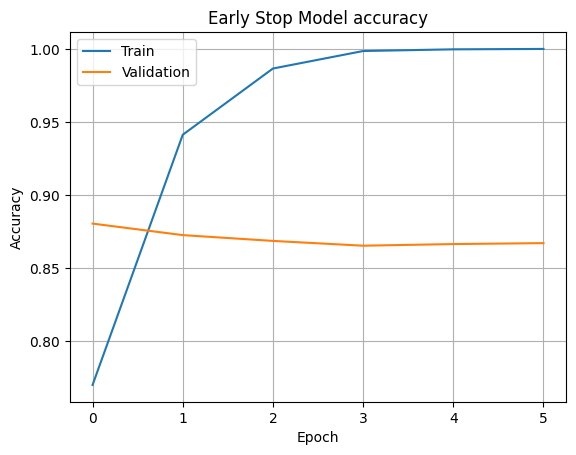

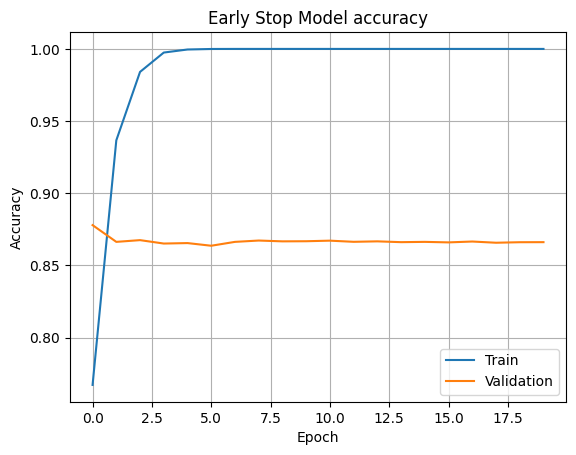

In [18]:
# 연습문제 6 [프로그램 8-7]에 조기 멈춤을 적용하고 적용하지 않았을때와 성능을 비교하시오.
# 7(a). 텐서플로가 제공하는 IMDB 데이터 살펴보기 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

dic_siz=10000
sample_siz=512

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=dic_siz)
print(x_train.shape,x_test.shape)
print(x_train[0])

word2id = imdb.get_word_index()
id2word = {w:i for i,w in word2id.items()}

for i in range(1,21): print(id2word[i],end='/')

# 7(b). 단어 임베딩을 사용해 IMDB 데이터를 부정/긍정 평가로 분류하는 학습 모델

embed_space_dim = 16 

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)
early=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)

def build_model():
    embed=Sequential()
    embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
    embed.add(Flatten())
    embed.add(Dense(32,activation='relu'))
    embed.add(Dense(1,activation='sigmoid'))
    embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')
    return embed

fit_arg = {
    'x': x_train,
    'y': y_train,
    'epochs': 20,
    'batch_size': 64,
    'validation_data': (x_test,y_test),
    'verbose': 0
}

models = {
    'early_stop_model': build_model(),
    'non_early_stop_model' : build_model()
}


hists={
    'early_stop_model': models['early_stop_model'].fit(**fit_arg,callbacks=[tqdm_callback,early]),
    'non_early_stop_model': models['non_early_stop_model'].fit(**fit_arg,callbacks=[tqdm_callback])
}

models['early_stop_model'].summary()
models['non_early_stop_model'].summary()

evaluate_arg = {
    'x':x_test,
    'y':y_test,
    'verbose':0
}
results = {n:m.evaluate(**evaluate_arg) for n,m in models.items()}

print('early stop 기술을 적용한 모델의 정확률은',results['early_stop_model'][1]*100)
print('early stop 기술을 적용하지 않은 모델의 정확률은',results['non_early_stop_model'][1]*100)

import matplotlib.pyplot as plt

plt.plot(hists['early_stop_model'].history['accuracy'])
plt.plot(hists['early_stop_model'].history['val_accuracy'])
plt.title('Early Stop Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

plt.plot(hists['non_early_stop_model'].history['accuracy'])
plt.plot(hists['non_early_stop_model'].history['val_accuracy'])
plt.title('Early Stop Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

k fold 0 start


Training:   0%|           0/20 ETA: ?s,  ?epochs/s

k fold 1 start


Training:   0%|           0/20 ETA: ?s,  ?epochs/s

k fold 2 start


Training:   0%|           0/20 ETA: ?s,  ?epochs/s

k fold 3 start


Training:   0%|           0/20 ETA: ?s,  ?epochs/s

k fold 4 start


Training:   0%|           0/20 ETA: ?s,  ?epochs/s

k-fold accuracy [0.8805999755859375, 0.8723999857902527, 0.8826000094413757, 0.8835999965667725, 0.8745999932289124] / 0.8787599921226501


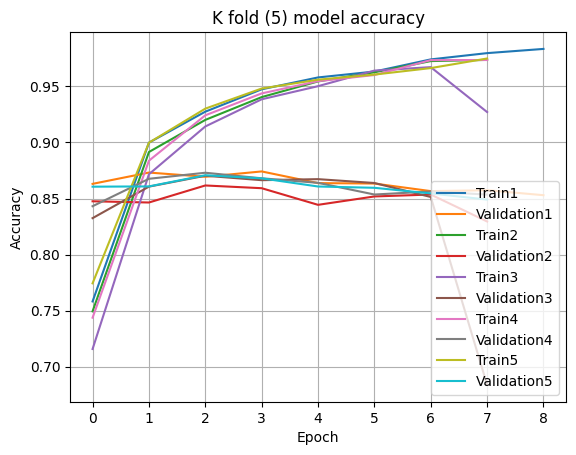

In [19]:
# 연습문제 7 [프로그램 8-8]에 교차 검증을 적용해 보다 신뢰성 높은 성능을 제시하시오.
# 8 워드 임베딩을 사용하서 IMDB 데이터를 부정/긍정로 분류하는 LSTM 신경망 학습 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
import tensorflow_addons as tfa 
import numpy as np 

dic_siz = 10000
sample_siz = 512 
embed_space_dim = 16

(x,y),(x_test,y_test) = imdb.load_data(num_words=dic_siz)
x,x_test = map(lambda d :preprocessing.sequence.pad_sequences(d,maxlen=sample_siz),[x,x_test])
def build_model():
    model = Sequential()
    model.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
    model.add(LSTM(units=32))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
    return model

def cross_validation(x, y, k_fold_num, validation_data,callbacks):
    histories,accuracies=[],[]
    for idx,(train_idx,val_idx) in enumerate(KFold(k_fold_num).split(x)):
        print('k fold', idx, 'start')
        x_train,x_val = x[train_idx],x[val_idx]
        y_train,y_val = y[train_idx],y[val_idx]
        
        model=build_model()
        histories.append(model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=validation_data,verbose=0,callbacks=callbacks))
        accuracies.append(model.evaluate(x_val,y_val,verbose=0)[1])
    return (histories,accuracies)

early=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)
tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)


histories,accuracies = cross_validation(x=x,y=y,k_fold_num=5,validation_data=(x_test,y_test),callbacks=[early,tqdm_callback])    

print('k-fold accuracy',accuracies,'/',np.array(accuracies).mean())

import matplotlib.pyplot as plt
for hist in histories:
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
plt.title('K fold (5) model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(sum([['Train'+str(idx),'Validation'+str(idx)] for idx in range(1,6)],[]),loc='best')
plt.grid()
plt.show()


400000


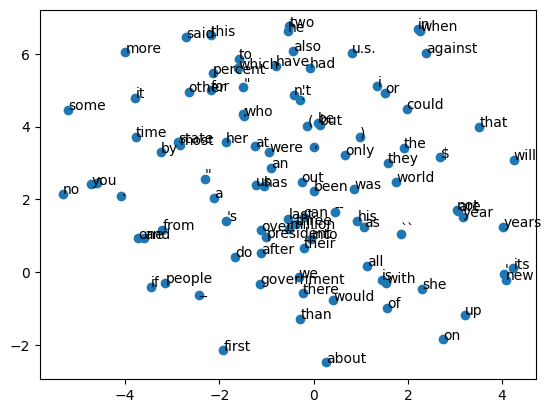

In [21]:
# 연습문제 8 [프로그램 8-9(b)]는 43행에서 vectors[:100]을 지정함으로써 앞에 있는 100개 단어를 시각화한다.
# 중간쯤에 위치한 100개 단어를 시각화하도록 프로그램을 수정하시오.
# 실행 결과를 해석하시오.
# 9(a). GloVe를 이용해 단어 임베딩 이해하기
import os 
import numpy as np 
from scipy.spatial import distance

fname='../temp/glove.6B.100d.txt'
    
with open(fname,encoding='utf8') as f:
    gdict = {line.split()[0]:np.asarray(line.split()[1:],dtype='float32') for line in f}

# 9(b). tsne를 이용한 시각화 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import numpy as np

tsne = TSNE(n_components=2, random_state=0)
words = list(gdict.keys())
vectors = np.array(list(gdict.values()))
print(len(vectors))
position = tsne.fit_transform(vectors[20000:20100])
pos = [position[:,0],position[:,1]]
plt.scatter(*pos)

for label,x,y in zip(words,*pos):
    plt.annotate(label,xy=(x,y))
plt.show()

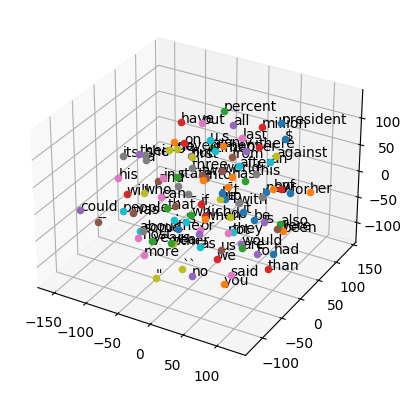

In [4]:
# 연습문제 9 [프로그램 8-9(b)]의 40 행에서 n_components=3으로 설정해 3차원 그래프를 그리는 버전으로 확장하시오.
import os 
import numpy as np 
from scipy.spatial import distance

fname='../temp/glove.6B.100d.txt'
    
with open(fname,encoding='utf8') as f:
    gdict = {line.split()[0]:np.asarray(line.split()[1:],dtype='float32') for line in f}

# 9(b). tsne를 이용한 시각화 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import numpy as np

tsne = TSNE(n_components=3, random_state=0)
words = list(gdict.keys())
vectors = np.array(list(gdict.values()))
position = tsne.fit_transform(vectors[:100])
pos = [position[:,0],position[:,1],position[:,2]]

ax = plt.figure().add_subplot(projection='3d')
for label,x,y,z in zip(words,*pos):
    ax.scatter(x,y,z)
    ax.text(x,y,z,label)

plt.show()